# Exploratory Data Analysis (EDA)
This notebook is used for exploratory data analysis of the credit risk dataset.
It includes data overview, summary statistics, visualizations, and insights.

Starting Exploratory Data Analysis for Bati Bank's Credit Risk Model...
Setup complete. Visualizations will be saved to notebooks/eda_plots/.

First 5 rows of the dataset:
         TransactionId         BatchId       AccountId       SubscriptionId  \
0  TransactionId_76871   BatchId_36123  AccountId_3957   SubscriptionId_887   
1  TransactionId_73770   BatchId_15642  AccountId_4841  SubscriptionId_3829   
2  TransactionId_26203   BatchId_53941  AccountId_4229   SubscriptionId_222   
3    TransactionId_380  BatchId_102363   AccountId_648  SubscriptionId_2185   
4  TransactionId_28195   BatchId_38780  AccountId_4841  SubscriptionId_3829   

        CustomerId CurrencyCode  CountryCode    ProviderId     ProductId  \
0  CustomerId_4406          UGX          256  ProviderId_6  ProductId_10   
1  CustomerId_4406          UGX          256  ProviderId_4   ProductId_6   
2  CustomerId_4683          UGX          256  ProviderId_6   ProductId_1   
3   CustomerId_988          UGX          256  Pro

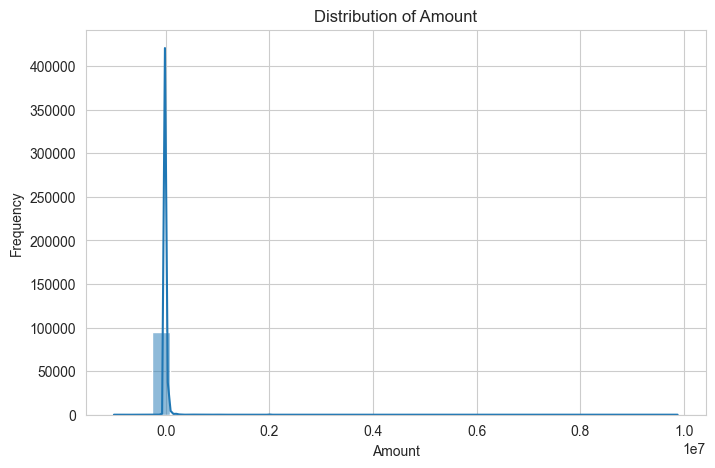

Saved amount_histogram.png


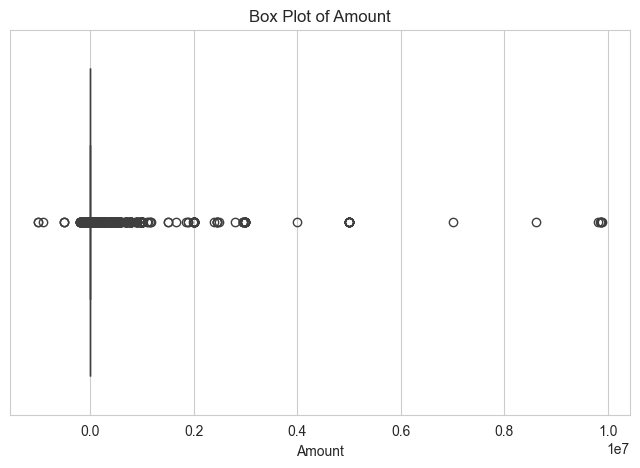

Saved amount_boxplot.png


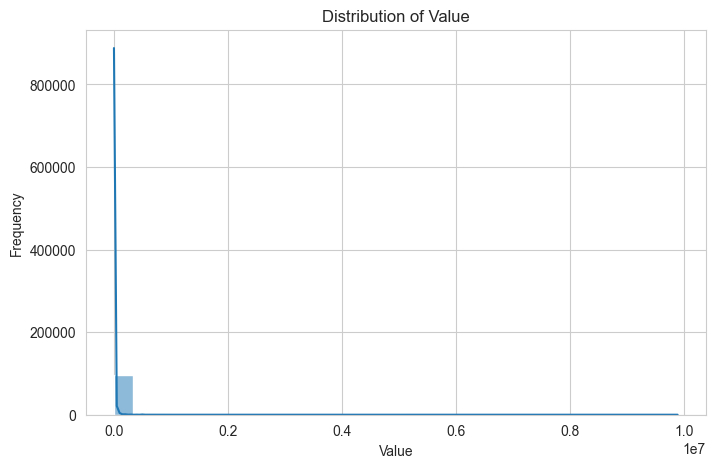

Saved value_histogram.png


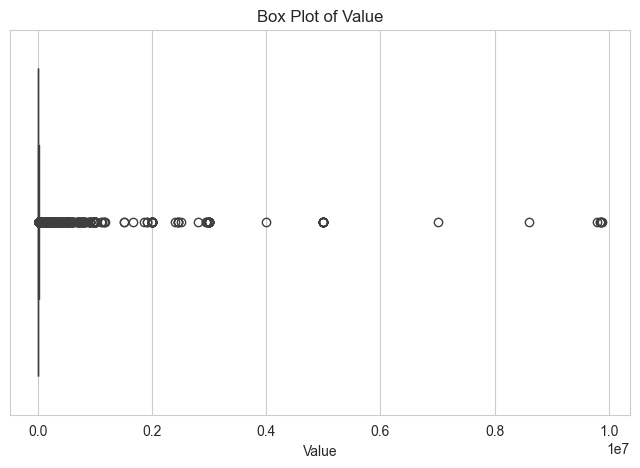

Saved value_boxplot.png


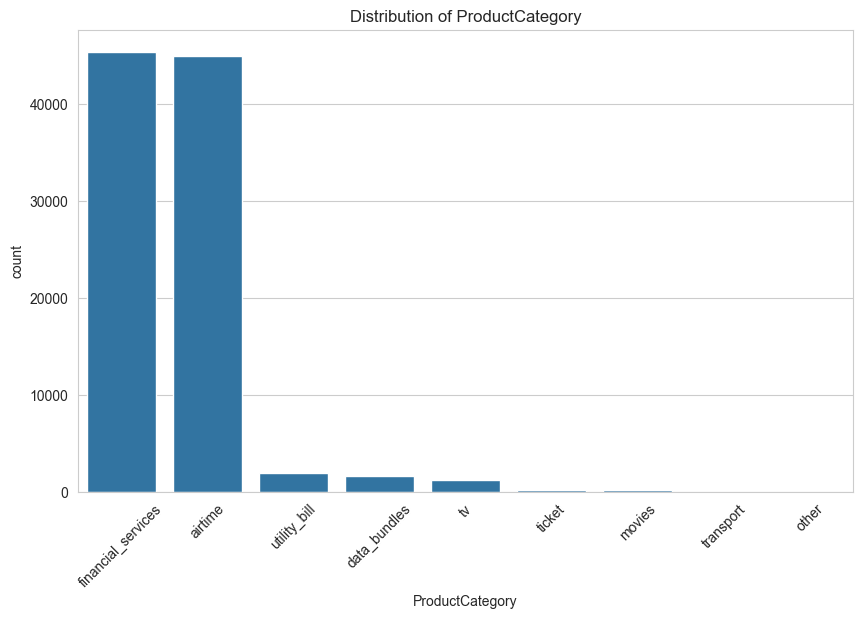

Saved productcategory_bar.png


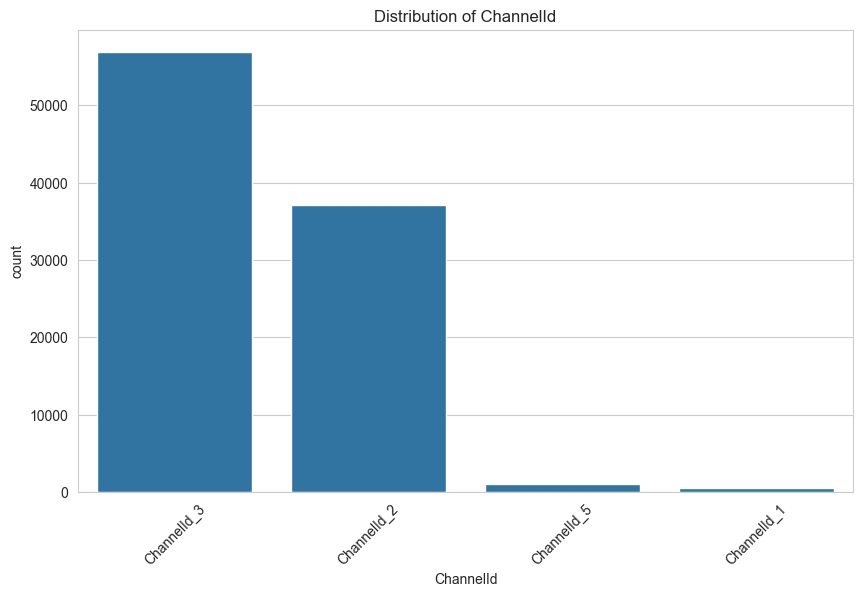

Saved channelid_bar.png


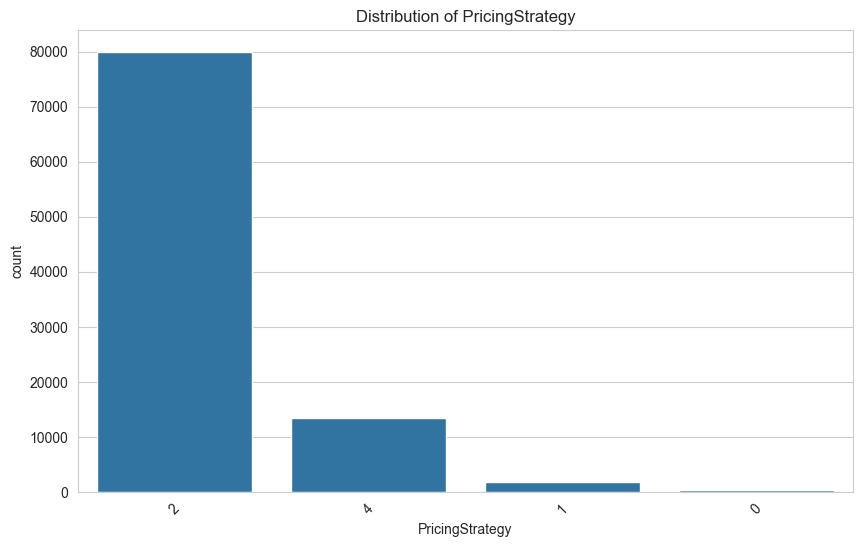

Saved pricingstrategy_bar.png


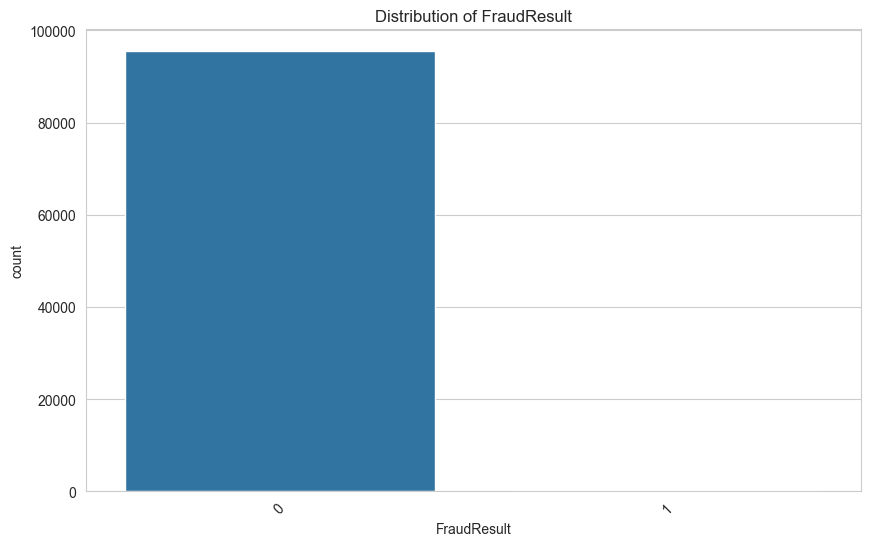

Saved fraudresult_bar.png


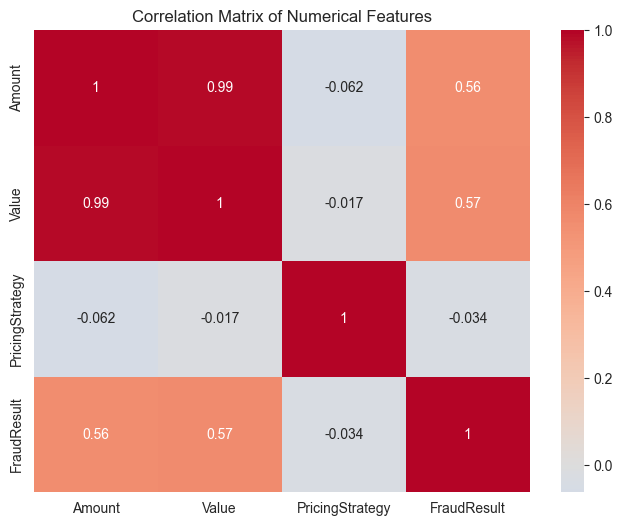

Saved correlation_heatmap.png

Missing Values:
Series([], dtype: int64)

No missing values found.

Outlier Detection:
Outliers in Amount: 24441
Example outlier values: [20000. 10000. 10000.  8000.  8000.]
Outliers in Value: 9021
Example outlier values: [21800 30000 41000 17000 15000]

Key Insights (update after reviewing outputs):
- Insight 1: Amount includes positive (debits, e.g., 20,000) and negative (credits, e.g., -644) values, suggesting separation for RFM analysis.
- Insight 2: ProductCategory dominated by airtime and financial_services, key for risk segmentation.
- Insight 3: FraudResult mostly 0, indicating imbalanced data needing special handling.
- Insight 4: High correlation between Amount and Value may suggest dropping Value.
- Insight 5: Outliers in Amount (e.g., 20,000 for utility_bill) may indicate high-risk transactions.


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os

# Sub-task: Set up the environment
# Purpose: Prepare the plotting style and create a folder to save visualizations, ensuring all plots are consistently formatted and stored.
def setup_environment():
    """Set up the plotting environment and create the output directory."""
    sns.set_style('whitegrid')
    os.makedirs('eda_plots', exist_ok=True)
    print("Setup complete. Visualizations will be saved to notebooks/eda_plots/.")

# Sub-task: Load the dataset
# Purpose: Read the transaction data from a CSV file and show the first few rows to understand its structure.
def load_data(file_path):
    """Load the dataset and display the first few rows."""
    df = pd.read_csv(file_path)
    print("\nFirst 5 rows of the dataset:")
    print(df.head())
    return df

# Sub-task: Data overview
# Purpose: Display the dataset's size (rows and columns) and data types to get a high-level understanding of its structure.
def data_overview(df):
    """Display dataset structure: rows, columns, and data types."""
    print("\nDataset Info:")
    df.info()
    print(f"\nNumber of rows: {df.shape[0]}")
    print(f"Number of columns: {df.shape[1]}")

# Sub-task: Summary statistics
# Purpose: Summarize numerical features (like Amount and Value) and categorical features (like ProductCategory) to understand their range, average, and frequency.
def summary_statistics(df):
    """Compute and display summary statistics for numerical and categorical features."""
    print("\nNumerical Features Summary:")
    print(df[['Amount', 'Value', 'CountryCode', 'PricingStrategy', 'FraudResult']].describe())
    print("\nCategorical Features Summary:")
    print(df[['CurrencyCode', 'ProviderId', 'ProductId', 'ProductCategory', 'ChannelId']].describe())

# Sub-task: Numerical feature distributions
# Purpose: Create and save histograms and box plots for numerical features (Amount, Value) to visualize their spread and identify unusual values.
def plot_numerical_distributions(df, numerical_cols):
    """Plot and save histograms and box plots for numerical features."""
    for col in numerical_cols:
        # Histogram
        plt.figure(figsize=(8, 5))
        sns.histplot(df[col], bins=30, kde=True)
        plt.title(f'Distribution of {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.savefig(f'eda_plots/{col.lower()}_histogram.png')
        plt.show()
        plt.close()
        print(f"Saved {col.lower()}_histogram.png")

        # Box plot
        plt.figure(figsize=(8, 5))
        sns.boxplot(x=df[col])
        plt.title(f'Box Plot of {col}')
        plt.savefig(f'eda_plots/{col.lower()}_boxplot.png')
        plt.show()
        plt.close()
        print(f"Saved {col.lower()}_boxplot.png")

# Sub-task: Categorical feature distributions
# Purpose: Create and save bar plots for categorical features (like ProductCategory, ChannelId) to see how often each category appears.
def plot_categorical_distributions(df, categorical_cols):
    """Plot and save bar plots for categorical features."""
    for col in categorical_cols:
        plt.figure(figsize=(10, 6))
        sns.countplot(x=col, data=df, order=df[col].value_counts().index)
        plt.title(f'Distribution of {col}')
        plt.xticks(rotation=45)
        plt.savefig(f'eda_plots/{col.lower()}_bar.png')
        plt.show()
        plt.close()
        print(f"Saved {col.lower()}_bar.png")

# Sub-task: Correlation analysis
# Purpose: Check if numerical features (like Amount and Value) are related to each other and save a heatmap to visualize these relationships.
def correlation_analysis(df, cols):
    """Plot and save a correlation heatmap for numerical features."""
    plt.figure(figsize=(8, 6))
    sns.heatmap(df[cols].corr(), annot=True, cmap='coolwarm', center=0)
    plt.title('Correlation Matrix of Numerical Features')
    plt.savefig('eda_plots/correlation_heatmap.png')
    plt.show()
    plt.close()
    print("Saved correlation_heatmap.png")

# Sub-task: Missing values analysis
# Purpose: Identify any missing data in the dataset and suggest ways to fill or handle them to ensure data quality.
def missing_values_analysis(df):
    """Analyze missing values and suggest imputation strategies."""
    print("\nMissing Values:")
    missing = df.isnull().sum()
    missing = missing[missing > 0]
    print(missing)
    if not missing.empty:
        print("\nProposed Imputation Strategies:")
        for col in missing.index:
            if df[col].dtype in ['int64', 'float64']:
                print(f"- {col}: Impute with mean or median")
            else:
                print(f"- {col}: Impute with mode or remove rows")
    else:
        print("\nNo missing values found.")

# Sub-task: Outlier detection
# Purpose: Find unusual values in numerical features (Amount, Value) that might affect the model, using a statistical method (IQR).
def outlier_detection(df, numerical_cols):
    """Detect outliers in numerical features using the IQR method."""
    print("\nOutlier Detection:")
    for col in numerical_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
        print(f"Outliers in {col}: {len(outliers)}")
        if len(outliers) > 0:
            print(f"Example outlier values: {outliers.head().values}")

def main():
    """Main function to run the EDA for Bati Bank's credit risk model."""
    print("Starting Exploratory Data Analysis for Bati Bank's Credit Risk Model...")
    
    # Run all sub-tasks
    setup_environment()
    df = load_data('../data/raw/data.csv')
    data_overview(df)
    summary_statistics(df)
    
    numerical_cols = ['Amount', 'Value']
    plot_numerical_distributions(df, numerical_cols)
    
    categorical_cols = ['ProductCategory', 'ChannelId', 'PricingStrategy', 'FraudResult']
    plot_categorical_distributions(df, categorical_cols)
    
    correlation_analysis(df, ['Amount', 'Value', 'PricingStrategy', 'FraudResult'])
    missing_values_analysis(df)
    outlier_detection(df, numerical_cols)
    
    # Sub-task: Summarize key insights
    # Purpose: Highlight 3-5 key findings from the analysis to guide feature engineering for the credit risk model.
    print("\nKey Insights (update after reviewing outputs):")
    print("- Insight 1: Amount includes positive (debits, e.g., 20,000) and negative (credits, e.g., -644) values, suggesting separation for RFM analysis.")
    print("- Insight 2: ProductCategory dominated by airtime and financial_services, key for risk segmentation.")
    print("- Insight 3: FraudResult mostly 0, indicating imbalanced data needing special handling.")
    print("- Insight 4: High correlation between Amount and Value may suggest dropping Value.")
    print("- Insight 5: Outliers in Amount (e.g., 20,000 for utility_bill) may indicate high-risk transactions.")

if __name__ == "__main__":
    main()